# Multi-class Classification

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.io as scio
import display_data as dd

## 1. Loading and Visualizing Data

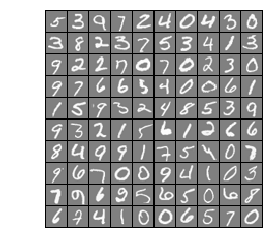

In [2]:
data = scio.loadmat('ex3data1.mat')
x = data['X']
y = data['y']
m = y.size
rand_indices = np.random.permutation(range(m))
selected = x[rand_indices[0:100], :]
dd.display_data(selected)

## 2. Vectorizing Logistic Regression
### 2.1 Vectorizing the cost function
cost:
$$J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def lrCostFunction(theta,x,y,lmd):
    y = y.reshape(-1,1)
    m = x.shape[0]
    theta = theta.reshape(-1,1)
    first = np.log(sigmoid(x@theta))*y
    second = np.log(1-sigmoid(x@theta))*(1-y)
    theta_1 = theta[1:,:]
    unregcost = -np.sum(first + second)/m
    reg = lmd*theta_1.T@theta_1/(2*m)
    return unregcost+reg

### 2.2 Vectorizing the gradient

In [5]:
def gradient(theta,x,y,lmd):
    m = x.shape[0]
    theta = theta.reshape(-1,1)
    y = y.reshape(-1,1)
    grad = x.T @ (sigmoid(x@theta) - y)/m
    grad[1:,:] = grad[1:,:] + lmd*theta[1:,:]/m
    return grad.ravel()

### 2.3 One-vs-all Classification

In [6]:
import scipy.optimize as opt

def oneVsAll(x, y, num_labels, lmd):
    n,m = x.shape
    all_theta = np.zeros((num_labels , m+1))
    x = np.insert(x, 0, values=np.ones(n), axis=1) #插入x0=1
    for i in range(1,num_labels+1):
        
        y_i = np.array([1 if label == i else 0 for label in y])
        theta_i = np.zeros(m+1)
        res = opt.minimize(lrCostFunction,theta_i,args=(x,y_i,lmd),method='BFGS',jac=gradient)
        print('i={},optimize success={}'.format(i,res.success))
        all_theta[i-1:,:] = res.x
        
    return all_theta   

In [7]:
%time all_theta = oneVsAll(x,y,10,1)

i=1,optimize success=True
i=2,optimize success=True
i=3,optimize success=True
i=4,optimize success=True
i=5,optimize success=True
i=6,optimize success=True
i=7,optimize success=True
i=8,optimize success=True
i=9,optimize success=True
i=10,optimize success=True
CPU times: user 45 s, sys: 274 ms, total: 45.2 s
Wall time: 23 s


### 2.4 One-vs-all Prediction

In [8]:
def predictOneVsAll(all_theta,x):    
    n,m = x.shape
    x = np.insert(x,0,np.ones(n),axis = 1)
    pre = sigmoid(x @ all_theta.T)
    num = np.argmax(pre, axis=1)
    num = num + 1
    return num

In [9]:
pre = predictOneVsAll(all_theta,x)
correct = np.array([1 if a==b else 0 for a,b in zip(pre,y.ravel())])
print('correct is {}%'.format(100*sum(correct)/len(correct)))

correct is 94.46%
